In [3]:
import os
import sys

import numpy as np
import pandas as pd

sys.path.append(os.path.join("..", ".."))

import pickle

import matplotlib.pyplot as plt
import pytorch_lightning as pl
from src.model_utils import Crop_LSTM, Crop_PL, drop_classes
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader
from tqdm import tqdm

import torch
from torch import nn

In [3]:
# Read dictionary pkl file
with open(os.path.join('..' ,'..', 'data', 'processed_files', 'pkls', 'X_down_lstm.pkl'), "rb") as fp:
    X = pickle.load(fp)

with open(os.path.join('..', '..', 'data', 'processed_files', 'pkls', 'y_down_lstm.pkl'), "rb") as fp:
    y = pickle.load(fp)

In [4]:
# load lstm model
path_to_pickled_models = os.path.join("..", "..", "results", "pickle_models")

clf_path = os.path.join(path_to_pickled_models, "Crop_LSTM.ckpt")

# Create a PyTorch model
network = Crop_LSTM()
checkpoint = torch.load(clf_path)
model = Crop_PL(net=network)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [7]:
# Define a function to calculate model precision_score
def calculate_precision_score(model, input_data, target_data):
    # check metrics
    predictions = torch.cat(trainer.predict(model, DataLoader(torch.tensor(input_data, dtype=torch.float), batch_size=2048)), dim=0)
    softmax = nn.Softmax(dim=1)
    y_pred = np.argmax(softmax(predictions.float()).numpy(), 1)
    precision_score_ = precision_score(np.argmax(target_data, 1), y_pred, average='macro')
    return precision_score_

 # create an instance of pl.Trainer
trainer = pl.Trainer(accelerator='gpu', devices=1, enable_progress_bar=False, enable_checkpointing=False, enable_model_summary=False, logger=False)
            
# Define your input and target data (assuming they are already loaded)
input_data = X['Test']
target_data = y['Test']

# Define the number of permutations to use
num_permutations = 10

# Load the feature names from a pickle file
with open(os.path.join("..", "..", "data", "npys_data", "keys_lstm.pkl"), "rb") as f:
    feature_names = pickle.load(f)

# Initialize an array to store the feature importance scores
feature_importance_scores = np.zeros(input_data.shape[2])

# Calculate original accuracy
original_precision_score = calculate_precision_score(model, input_data, target_data)

# Loop over each feature dimension
for feature_dim in range(input_data.shape[2]):
    print(f"Calculating importance for feature {feature_names[feature_dim]}")
    
    # Loop over each permutation
    for i in range(num_permutations):
        # Create a copy of the input data for shuffling
        shuffled_input_data = input_data.copy()
        
        # Shuffle the values of the current feature dimension
        np.random.shuffle(shuffled_input_data[:, :, feature_dim])
        
        # Calculate the accuracy of the model on the shuffled input data
        shuffled_precision_score = calculate_precision_score(model, shuffled_input_data, target_data)
        
        # Calculate the difference in accuracy between the shuffled and original input data
        importance_score = original_precision_score - shuffled_precision_score
        
        # Add the importance score to the array
        feature_importance_scores[feature_dim] += importance_score
    
    # Divide the sum of importance scores by the number of permutations to get the mean score
    feature_importance_scores[feature_dim] /= num_permutations

# Print the global feature importance scores
print("Feature importance scores:")
for i, feature_name in enumerate(feature_names):
    print(f"{feature_name}: {feature_importance_scores[i]:.3f}")


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature fy


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature monT0ud


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature monTstep6


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature pr_p95


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature sfcWindmax


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature snw


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature t2m


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature tasmax


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature tasmin


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature tp


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature 12m_SPI


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature DEM_1km


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_11_1


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_11_2


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_11_3


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_11_4


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_11_5


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_11_6


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_11_7


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_11_8


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_11_9


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_11_10


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_3_1


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_3_2


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_3_3


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_3_4


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_3_5


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_3_6


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_3_7


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_3_8


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_3_9


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_3_10


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_33_1


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_33_2


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_33_3


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_33_4


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_33_5


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_33_6


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_33_7


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_33_8


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_33_9


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_33_10


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_47_1


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_47_2


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_47_3


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_47_4


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_47_5


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_47_6


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_47_7


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_47_8


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_47_9


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Calculating importance for feature morf_47_10


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Feature importance scores:
fy: 0.038
monT0ud: 0.165
monTstep6: 0.212
pr_p95: 0.063
sfcWindmax: 0.051
snw: 0.051
t2m: 0.199
tasmax: 0.064
tasmin: 0.076
tp: 0.201
12m_SPI: 0.071
DEM_1km: 0.005
morf_11_1: 0.025
morf_11_2: 0.006
morf_11_3: 0.000
morf_11_4: 0.000
morf_11_5: -0.000
morf_11_6: 0.000
morf_11_7: 0.000
morf_11_8: 0.013
morf_11_9: 0.024
morf_11_10: 0.001
morf_3_1: 0.017
morf_3_2: 0.000
morf_3_3: 0.000
morf_3_4: 0.000
morf_3_5: 0.000
morf_3_6: 0.000
morf_3_7: 0.001
morf_3_8: 0.017
morf_3_9: 0.033
morf_3_10: 0.000
morf_33_1: 0.030
morf_33_2: 0.014
morf_33_3: 0.000
morf_33_4: 0.000
morf_33_5: 0.000
morf_33_6: 0.000
morf_33_7: 0.001
morf_33_8: 0.009
morf_33_9: 0.013
morf_33_10: 0.001
morf_47_1: 0.033
morf_47_2: 0.042
morf_47_3: 0.000
morf_47_4: -0.000
morf_47_5: 0.000
morf_47_6: 0.000
morf_47_7: 0.002
morf_47_8: 0.014
morf_47_9: 0.012
morf_47_10: 0.001


In [8]:
prerm_feature_importance_lstm = pd.DataFrame(data= feature_importance_scores, index = feature_names, columns=['precision_difference'])
top_features = prerm_feature_importance_lstm.sort_values(by=['precision_difference'], ascending=False) 
top_features[:15] 

precision_difference
monTstep6               0.212069
tp                      0.201228
t2m                     0.198825
monT0ud                 0.164513
tasmin                  0.075764
12m_SPI                 0.070650
tasmax                  0.063898
pr_p95                  0.062717
sfcWindmax              0.051365
snw                     0.051349
morf_47_2               0.041873
fy                      0.037594
morf_3_9                0.033375
morf_47_1               0.032685
morf_33_1               0.029633

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


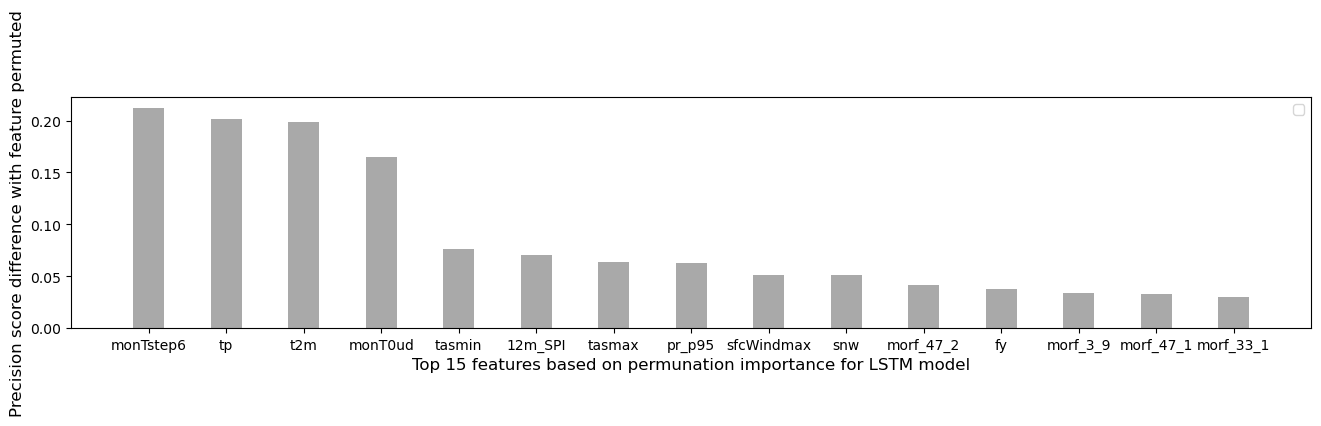

In [9]:
plt.figure(figsize=(16,3))
plt.bar(list(top_features[:15].index), [i[0] for i in top_features[:15].values], width=0.4, color = 'darkgray')
plt.xlim((-1,15))
plt.xlabel('Top 15 features based on permunation importance for LSTM model', size = 12)
plt.ylabel('Precision score difference with feature permuted',size=12)
plt.legend()
plt.show()

In [10]:
top_features.to_csv('lstm_perm_impornance_precision_score.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


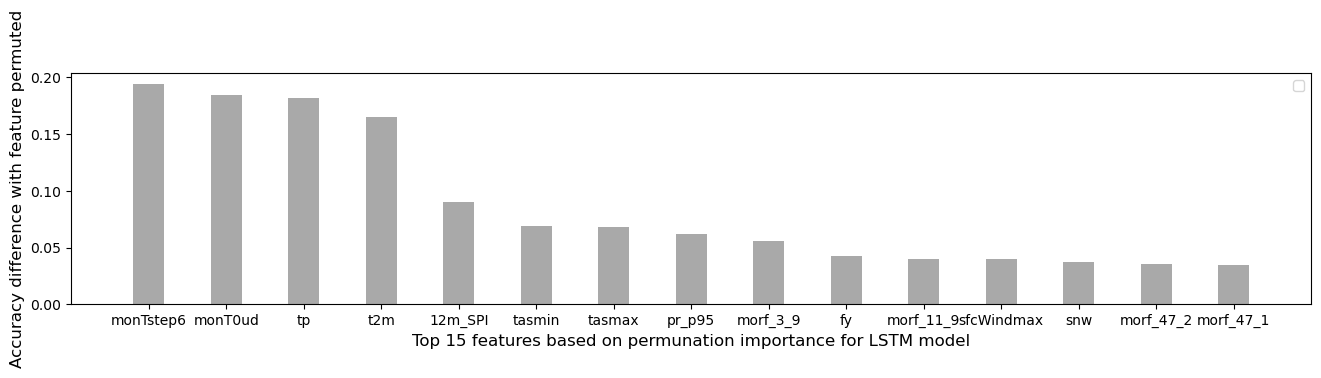

In [ ]:
plt.figure(figsize=(16,3))
plt.bar(list(top_features[:15].index), [i[0] for i in top_features[:15].values], width=0.4, color = 'darkgray')
plt.xlim((-1,15))
plt.xlabel('Top 15 features based on permunation importance for LSTM model', size = 12)
plt.ylabel('Precision score difference with feature permuted',size=12)
plt.legend()
plt.show()

In [ ]:
# Define a function to calculate model accuracy
def calculate_accuracy(model, input_data, target_data):
    # check metrics
    predictions = torch.cat(trainer.predict(model, DataLoader(torch.tensor(input_data, dtype=torch.float), batch_size=2048)), dim=0)
    softmax = nn.Softmax(dim=1)
    y_pred = np.argmax(softmax(predictions.float()).numpy(), 1)
    accuracy = accuracy_score(np.argmax(target_data, 1), y_pred)
    return accuracy

# Load your PyTorch LSTM model from a checkpoint
network = Crop_LSTM()
checkpoint = torch.load(clf_dict["lstm_nn"])
model = Crop_PL(net=network)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

 # create an instance of pl.Trainer
trainer = pl.Trainer(accelerator='gpu', devices=1, enable_progress_bar=False, enable_checkpointing=False, enable_model_summary=False, logger=False)
            
# Define your input and target data (assuming they are already loaded)
input_data = X['Test']
target_data = y['Test']

# Define the number of permutations to use
num_permutations = 10

# Load the feature names from a pickle file
with open(os.path.join("..", "..", "data", "Npys_data", "keys_lstm.pkl"), "rb") as f:
    feature_names = pickle.load(f)

# Initialize an array to store the feature importance scores
feature_importance_scores = np.zeros(input_data.shape[2])

# Calculate original accuracy
original_accuracy = calculate_accuracy(model, input_data, target_data)

# Loop over each feature dimension
for feature_dim in range(input_data.shape[2]):
    print(f"Calculating importance for feature {feature_names[feature_dim]}")
    
    # Loop over each permutation
    for i in range(num_permutations):
        # Create a copy of the input data for shuffling
        shuffled_input_data = input_data.copy()
        
        # Shuffle the values of the current feature dimension
        np.random.shuffle(shuffled_input_data[:, :, feature_dim])
        
        # Calculate the accuracy of the model on the shuffled input data
        shuffled_accuracy = calculate_accuracy(model, shuffled_input_data, target_data)
        
        # Calculate the difference in accuracy between the shuffled and original input data
        importance_score = original_accuracy - shuffled_accuracy
        
        # Add the importance score to the array
        feature_importance_scores[feature_dim] += importance_score
    
    # Divide the sum of importance scores by the number of permutations to get the mean score
    feature_importance_scores[feature_dim] /= num_permutations

# Print the global feature importance scores
print("Feature importance scores:")
for i, feature_name in enumerate(feature_names):
    print(f"{feature_name}: {feature_importance_scores[i]:.3f}")


In [37]:
prerm_feature_importance_lstm = pd.DataFrame(data= feature_importance_scores, index = feature_names, columns=['accuracy_difference'])

In [39]:
top_features = prerm_feature_importance_lstm.sort_values(by=['accuracy_difference'], ascending=False) 
top_features[:15] 

accuracy_difference
monTstep6              0.193620
monT0ud                0.184677
tp                     0.181792
t2m                    0.165271
12m_SPI                0.089979
tasmin                 0.069294
tasmax                 0.068127
pr_p95                 0.061851
morf_3_9               0.055975
fy                     0.042899
morf_11_9              0.040273
sfcWindmax             0.040163
snw                    0.037688
morf_47_2              0.035710
morf_47_1              0.034514

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


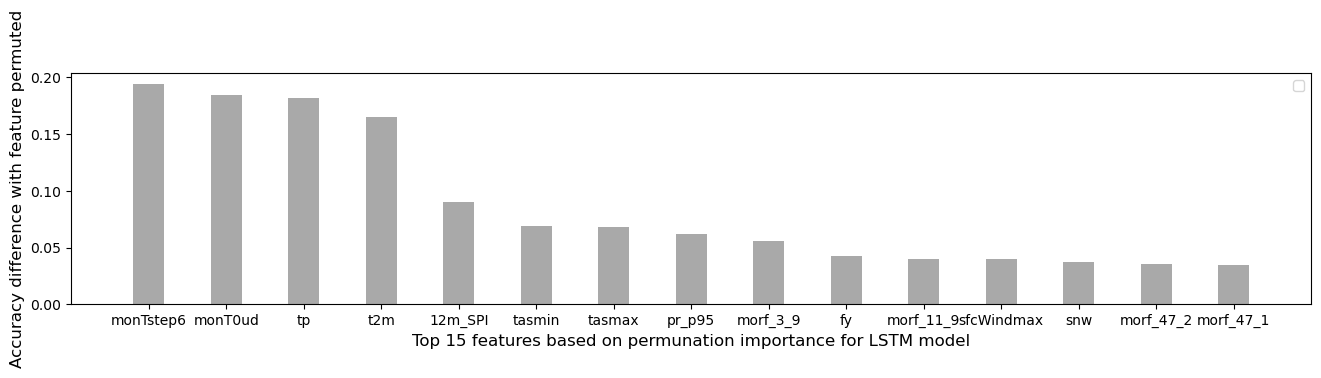

In [44]:
plt.figure(figsize=(16,3))
plt.bar(list(top_features[:15].index), [i[0] for i in top_features[:15].values], width=0.4, color = 'darkgray')
# plt.title('LSTM Feature Importance',size=16)
plt.xlim((-1,15))
plt.xlabel('Top 15 features based on permunation importance for LSTM model', size = 12)
plt.ylabel('Accuracy difference with feature permuted',size=12)
plt.legend()
plt.show()

In [42]:
top_features.to_csv('lstm_perm_impornance_accuracy.csv')

In [9]:
from sklearn.inspection import permutation_importance

# Assume that you have trained your LSTM model and have test data
# X_test and y_test are the test input features and labels respectively

# Calculate feature importance using permutation feature importance
result = permutation_importance(model, torch.tensor(X['Train'], dtype=torch.float), torch.tensor(y['Train'], dtype=torch.float), n_repeats=10, random_state=0)

# Print feature importance scores
print(result.importances_mean)

ValueError: Found array with dim 3. None expected <= 2.

In [80]:
model.net

tensor([[1., 0., 0., 0.]])

In [89]:
from captum import attr

interpreter = attr.IntegratedGradients(model.net)

interpreter

In [102]:
attributions = interpreter.attribute(torch.tensor(X['Test'], dtype=torch.float), target=torch.tensor(y['Test'], dtype=torch.float).argmax(dim=1))


: 

: 

In [98]:
attributions.shape

torch.Size([100, 12, 52])

In [99]:
attributions.mean(axis=0).mean(axis=0)

tensor([-0.0085,  0.0714, -0.0121, -0.0156,  0.0202,  0.0010,  0.0287, -0.0138,
         0.0142, -0.0078, -0.0132, -0.0069, -0.0013, -0.0040,  0.0074,  0.0038,
        -0.0077,  0.0029, -0.0039, -0.0117, -0.0043,  0.0020, -0.0052, -0.0029,
         0.0053,  0.0052,  0.0008,  0.0001,  0.0012,  0.0106, -0.0145, -0.0012,
        -0.0015, -0.0007,  0.0003, -0.0010,  0.0030, -0.0015, -0.0077, -0.0318,
         0.0004,  0.0080, -0.0018, -0.0019, -0.0011, -0.0026, -0.0029,  0.0010,
        -0.0062, -0.0348,  0.0020,  0.0051], dtype=torch.float64)

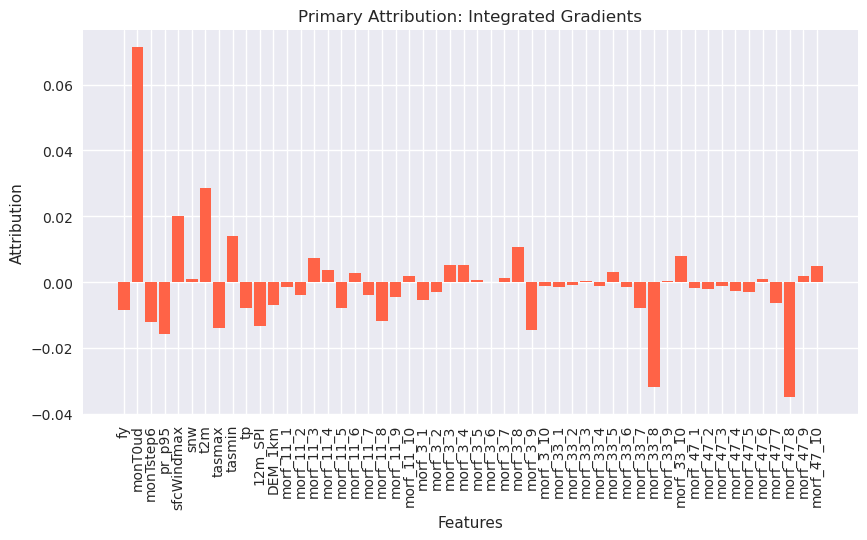

In [100]:
with matplotlib.style.context("seaborn"):
    plt.figure(figsize=(10,5))
    plt.bar(range(len(feature_names)), attributions.mean(axis=0).mean(axis=0), width=0.85, color="tomato")
    plt.xticks(range(len(feature_names)), feature_names, rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Attribution")
    plt.title("Primary Attribution: Integrated Gradients")

In [82]:
attributions.shape

torch.Size([1, 12, 52])

In [ ]:
from captum.attr import IntegratedGradients
from captum.attr import visualization as viz
import captum
import matplotlib

# Create an Integrated Gradients explainer object for the LSTM model
integrated_gradients  = IntegratedGradients(model)

# Calculate feature importance using Integrated Gradients for a specific input sample
attributions = integrated_gradients.attribute(torch.tensor(X['Train'][:10], dtype=torch.float), target=0)


In [51]:
attributions.shape

torch.Size([10, 12, 52])

IndexError: index 27 is out of bounds for axis 0 with size 12

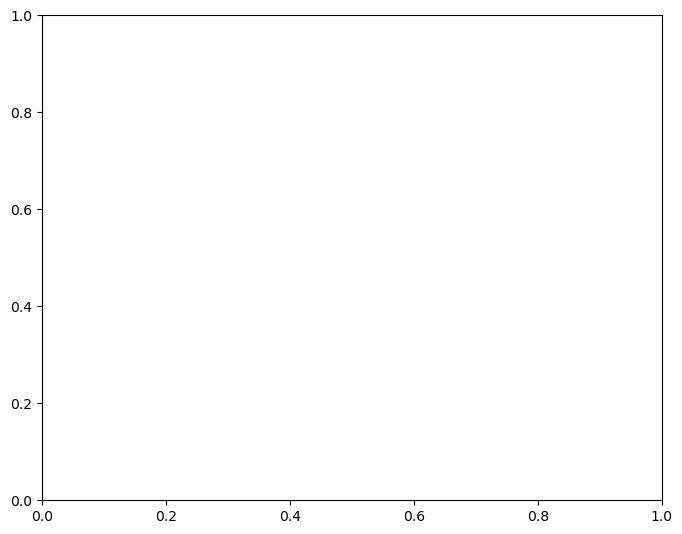

In [101]:
# Create a SHAP explainer object for the PyTorch model on the CPU
explainer = shap.DeepExplainer(model.net, torch.tensor(X['Train'][:10], dtype=torch.float))

# Calculate SHAP values for the test data on the GPU
shap_values = explainer.shap_values(torch.tensor(X['Test'][:10], dtype=torch.float))

# Plot the SHAP values for a specific feature
shap.summary_plot(shap_values, X['Test'][:10], plot_type="bar", feature_names=feature_names)

In [54]:
X['Test'].shape

(654340, 12, 52)

In [57]:
# Define a function that returns the LSTM output given an input sequence
def lstm_forward(lstm, x):
    h = None
    c = None
    for t in range(x.shape[1]):
        out, (h, c) = lstm(x[:, t, :].unsqueeze(1), (h, c))
    return out.squeeze(1)

# Define a PyTorch module wrapper that calls the lstm_forward function
class LSTMPredictor(nn.Module):
    def __init__(self, lstm):
        super().__init__()
        self.lstm = lstm

    def forward(self, x):
        out = lstm_forward(self.lstm, x)
        return out

# Create an instance of your LSTM model
# Load your PyTorch LSTM model from a checkpoint
network = Crop_LSTM()
checkpoint = torch.load(clf_dict["lstm_nn"])
model = Crop_PL(net=network)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# Wrap the LSTM in a PyTorch module
model_wrapper = LSTMPredictor(model)

# Define the SHAP explainer function
def lstm_shap_explainer(model, x):
    with torch.no_grad():
        # Define a PyTorch function that takes a sequence and returns the LSTM output
        def model_fn(x):
            return model(x)
        # Create a SHAP explainer object
        explainer = shap.Explainer(model_fn, x)
        # Compute SHAP values for the input sequence
        shap_values = explainer.shap_values(x)
        return shap_values

# Call the explainer function on your input data to get the SHAP values
shap_values = lstm_shap_explainer(model_wrapper, X['Test'][:10])

# Plot the SHAP values as a heatmap
shap.plots.heatmap(shap_values)
plt.show()

AttributeError: module 'warnings' has no attribute 'DeprecationWarning'

In [58]:
model

Crop_PL(
  (net): Crop_LSTM(
    (lstm): LSTM(52, 104, num_layers=4, batch_first=True)
    (linearLayer1): Linear(in_features=104, out_features=104, bias=True)
    (linearLayer2): Linear(in_features=104, out_features=4, bias=True)
    (act): ReLU()
  )
  (softmax): Softmax(dim=None)
  (criterion): CrossEntropyLoss()
  (train_loss): MeanMetric()
  (val_loss): MeanMetric()
  (test_loss): MeanMetric()
  (val_F1Score_best): MaxMetric()
  (train_accuracy): MulticlassAccuracy()
  (val_accuracy): MulticlassAccuracy()
  (test_accuracy): MulticlassAccuracy()
  (train_avg_precision): MulticlassAveragePrecision()
  (val_avg_precision): MulticlassAveragePrecision()
  (test_avg_precision): MulticlassAveragePrecision()
  (train_precision): MulticlassPrecision()
  (val_precision): MulticlassPrecision()
  (test_precision): MulticlassPrecision()
  (train_recall): MulticlassRecall()
  (val_recall): MulticlassRecall()
  (test_recall): MulticlassRecall()
  (train_F1Score): MulticlassF1Score()
  (val_F1Sco

In [ ]:
# Split the test data into smaller batches
# Move the model to the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size = 4096
n_samples = X['Test'].shape[0]
n_batches = int(np.ceil(n_samples / batch_size))
X_batches = np.array_split(X['Test'], n_batches)

# Calculate SHAP values for the test data by batch on the GPU
shap_values_batches = []
for i in range(n_batches):
    # Create a PyTorch model
    network = Crop_LSTM()
    checkpoint = torch.load(clf_dict["lstm_nn"])
    model = Crop_PL(net=network)
    model.load_state_dict(checkpoint['state_dict'])
    
    # Move the model to the GPU
    model.to(device)

    # Create a SHAP explainer object for the PyTorch model on the GPU
    explainer = shap.DeepExplainer(model.to(device), torch.tensor(X['Train'], dtype=torch.float).to(device))

    # Calculate SHAP values for the current batch on the GPU
    shap_values_batch = explainer.shap_values(torch.tensor(X_batches[i], dtype=torch.float).to(device))

    # Append the SHAP values for the current batch to the list of SHAP values
    shap_values_batches.append(shap_values_batch)

# Concatenate the SHAP values for all batches
shap_values = np.concatenate(shap_values_batches, axis=0)

In [2]:
# defining paths
path_to_Npys_data = os.path.join("..", "data", "Npys_data")

pathFeatures = os.path.join(path_to_Npys_data, "features_initial_data_v1.npy")

# Features
X = pd.DataFrame.from_dict(np.load(pathFeatures, allow_pickle=True), orient="columns")
keys = list(X.keys())

In [3]:
path_to_Npys_data = os.path.join("..", "data", "Npys_data")

pathTarget_3 = os.path.join(
    os.path.join(path_to_Npys_data, "target_arables.npy")
)

In [4]:
# Target Variable
y = pd.DataFrame.from_dict(
    np.load(pathTarget_3, allow_pickle=True), orient="columns"
)
y = y["Target"].to_numpy()

# Set classes 4,5 to 0
y = np.where(y == 5, 0, y)
y = np.where(y == 4, 0, y)

## Data Preparation 
### Train/test split

In [5]:
# Drop data belonging to out of interest data (Class 255 corresponds to NaNs due to reprojection)
X, y = drop_classes(X, y, [np.nan])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=123
)

# Define scaler based on whole dataset
scaler = MinMaxScaler()
minmax = scaler.fit(X_train)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

del X, y, X_train, y_train

# Normalization using minmax scaler
X_test = pd.DataFrame(minmax.transform(X_test), columns=keys)


X_train shape: (8822006, 162)
X_test shape: (2940669, 162)


In [6]:
from model_utils import downsample

# Downsampling 0 Class and optionally oversampling the rest data
X_test, y_test = downsample(X_test, y_test, oversampling=False)

Initial data:
[(0.0, 2520160), (3.0, 266918), (2.0, 118407), (1.0, 35184)]
Resampled data:
[(0.0, 266918), (3.0, 266918), (2.0, 118407), (1.0, 35184)]


In [7]:
# Train/test split
X_train, X_test_small, y_test, y_test_small = train_test_split(
    X_test, y_test, test_size=0.01, stratify=y_test, random_state=123
)

In [8]:
X_test_small.shape

(6875, 162)

In [9]:
from model_utils import reshape_data

X_test_t = reshape_data(X_test_small)

In [10]:
X_test_t.shape

(6875, 12, 52)

In [11]:
list_of_features = [
        "fy_M1",
        "fy_M2",
        "fy_M3",
        "fy_M4",
        "fy_M5",
        "fy_M6",
        "fy_M7",
        "fy_M8",
        "fy_M9",
        "fy_M10",
        "fy_M11",
        "fy_M12",
        "monT0ud_M1",
        "monT0ud_M2",
        "monT0ud_M3",
        "monT0ud_M4",
        "monT0ud_M5",
        "monT0ud_M6",
        "monT0ud_M7",
        "monT0ud_M8",
        "monT0ud_M9",
        "monT0ud_M10",
        "monT0ud_M11",
        "monT0ud_M12",
        "monTstep6_M1",
        "monTstep6_M2",
        "monTstep6_M3",
        "monTstep6_M4",
        "monTstep6_M5",
        "monTstep6_M6",
        "monTstep6_M7",
        "monTstep6_M8",
        "monTstep6_M9",
        "monTstep6_M10",
        "monTstep6_M11",
        "monTstep6_M12",
        "pr_p95_M1",
        "pr_p95_M2",
        "pr_p95_M3",
        "pr_p95_M4",
        "pr_p95_M5",
        "pr_p95_M6",
        "pr_p95_M7",
        "pr_p95_M8",
        "pr_p95_M9",
        "pr_p95_M10",
        "pr_p95_M11",
        "pr_p95_M12",
        "sfcWindmax_M1",
        "sfcWindmax_M2",
        "sfcWindmax_M3",
        "sfcWindmax_M4",
        "sfcWindmax_M5",
        "sfcWindmax_M6",
        "sfcWindmax_M7",
        "sfcWindmax_M8",
        "sfcWindmax_M9",
        "sfcWindmax_M10",
        "sfcWindmax_M11",
        "sfcWindmax_M12",
        "snw_M1",
        "snw_M2",
        "snw_M3",
        "snw_M4",
        "snw_M5",
        "snw_M6",
        "snw_M7",
        "snw_M8",
        "snw_M9",
        "snw_M10",
        "snw_M11",
        "snw_M12",
        "t2m_M1",
        "t2m_M2",
        "t2m_M3",
        "t2m_M4",
        "t2m_M5",
        "t2m_M6",
        "t2m_M7",
        "t2m_M8",
        "t2m_M9",
        "t2m_M10",
        "t2m_M11",
        "t2m_M12",
        "tasmax_M1",
        "tasmax_M2",
        "tasmax_M3",
        "tasmax_M4",
        "tasmax_M5",
        "tasmax_M6",
        "tasmax_M7",
        "tasmax_M8",
        "tasmax_M9",
        "tasmax_M10",
        "tasmax_M11",
        "tasmax_M12",
        "tasmin_M1",
        "tasmin_M2",
        "tasmin_M3",
        "tasmin_M4",
        "tasmin_M5",
        "tasmin_M6",
        "tasmin_M7",
        "tasmin_M8",
        "tasmin_M9",
        "tasmin_M10",
        "tasmin_M11",
        "tasmin_M12",
        "tp_M1",
        "tp_M2",
        "tp_M3",
        "tp_M4",
        "tp_M5",
        "tp_M6",
        "tp_M7",
        "tp_M8",
        "tp_M9",
        "tp_M10",
        "tp_M11",
        "tp_M12",
        "12m_SPI",
        "DEM_1km",
        "morf_11_1",
        "morf_11_2",
        "morf_11_3",
        "morf_11_4",
        "morf_11_5",
        "morf_11_6",
        "morf_11_7",
        "morf_11_8",
        "morf_11_9",
        "morf_11_10",
        "morf_3_1",
        "morf_3_2",
        "morf_3_3",
        "morf_3_4",
        "morf_3_5",
        "morf_3_6",
        "morf_3_7",
        "morf_3_8",
        "morf_3_9",
        "morf_3_10",
        "morf_33_1",
        "morf_33_2",
        "morf_33_3",
        "morf_33_4",
        "morf_33_5",
        "morf_33_6",
        "morf_33_7",
        "morf_33_8",
        "morf_33_9",
        "morf_33_10",
        "morf_47_1",
        "morf_47_2",
        "morf_47_3",
        "morf_47_4",
        "morf_47_5",
        "morf_47_6",
        "morf_47_7",
        "morf_47_8",
        "morf_47_9",
        "morf_47_10",
    ]

In [12]:
X_test_t = torch.tensor(X_test_t, dtype=torch.float)

In [13]:
time_steps = 12
in_size = 52 
classes_no = 4
hidden_size = 52 * 2
num_layers = 4

class ArableNet(nn.Module):
    def __init__(self) -> None:
        super(ArableNet, self).__init__()
        self.lstm = nn.LSTM(in_size, hidden_size, num_layers, batch_first=True)
        self.linearLayer = nn.Linear(hidden_size, hidden_size)
        self.act = nn.ReLU()
        self.linearLayer2 = nn.Linear(hidden_size, classes_no)
        #self.softAct = nn.Softmax()
        
    def forward(self, X):
        lstm_out, _ = self.lstm(X)
        X  = self.act(self.linearLayer(lstm_out[:,-1,:]))
        X = self.linearLayer2(X)
        return X

In [14]:
path_to_pickled_models = os.path.join("..", "results", "pickle_models")

clf_dict = {
    "lr": os.path.join(
        path_to_pickled_models, "Logistic_Regression_3_avg_final_v1.pkl"
    ),
    "xgbt": os.path.join(path_to_pickled_models, "XGBoost_3_avg_final_v1.pkl"),
    "lgbm": os.path.join(path_to_pickled_models, "LightGBM_3_avg_final_v1.pkl"),
    "MLP": os.path.join(path_to_pickled_models, "linear_nn_avg_final_v3.pickle"),
    "lstm_nn": os.path.join(path_to_pickled_models, "lstm_nn_avg_final_v1.pickle"),
}

In [16]:
#lstm 

# loading the models:
model_loaded = ArableNet()
model_loaded.load_state_dict(torch.load(clf_dict['lstm_nn']))
# model_loaded.eval()
model_loaded.train()
# with torch.no_grad():

model_loaded = model_loaded.to(device=2)
X_test_t = X_test_t.to(device=2)
# Create object that can calculate shap values
explainer = shap.DeepExplainer(model_loaded, X_test_t)
shap.initjs()


In [19]:
torch.backends.cudnn.enabled=False

# calculate shap values. This is what we will plot.]# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test_t)


In [ ]:
# Summary plot of feature importances for all classes
shap.summary_plot(shap_values, X_test_t, show=False)
plt.savefig(os.path.join("..", "results", "shap", 'lstm', 'summary_plot.png'))
plt.close()

In [21]:
# Summary plot of feature importance for each class
for i in range(4):
    shap.summary_plot(shap_values[i], X_test_t, feature_names = X_test_small.keys(), show=False)
    plt.savefig(os.path.join("..", "results", "shap", 'lstm', 'summary_plot_class_' + str(i) + '.png'))
    plt.close()

This plot is made of many dots. Each dot has three characteristics:

- Vertical location shows what feature it is depicting
- Color shows whether that feature was high or low for that row of the dataset
- Horizontal location shows whether the effect of that value caused a higher or lower prediction.


### Get important features according to SHAP:

In [24]:
X = X_test_small
features_groups = dict(DEM = [name for name in X.keys() if "DEM" in name],
                       morf_3 = [name for name in X.keys() if "morf_3_" in name],
                       morf_11 = [name for name in X.keys() if "morf_11" in name],
                       morf_33 = [name for name in X.keys() if "morf_33" in name],
                       morf_47 = [name for name in X.keys() if "morf_47" in name],
                       snw = [name for name in X.keys() if "snw" in name],
                       tasmin = [name for name in X.keys() if "tasmin" in name],
                       tasmax =  [name for name in X.keys() if "tasmax" in name],
                       sfcWindmax = [name for name in X.keys() if "sfcWindmax" in name],
                       SPI = [name for name in X.keys() if "SPI" in name],
                       pr_p95 = [name for name in X.keys() if "pr_p95" in name],
                       fy = [name for name in X.keys() if "fy" in name],
                       tp = [name for name in X.keys() if "tp" in name],
                       t2m = [name for name in X.keys() if "t2m" in name],
                       monT0ud = [name for name in X.keys() if "monT0ud" in name],
                       monTstep6 = [name for name in X.keys() if "monTstep6" in name],
                       )

In [27]:
feature_names = list(X_test_small.keys())

In [29]:
features_groups_ind = dict()
for key in features_groups.keys():
    features_groups_ind[key] = [feature_names.index(i) for i in features_groups[key]]
features_groups_ind 

{'DEM': [1],
 'morf_3': [48, 49, 50, 51, 52, 53, 54, 55, 56, 57],
 'morf_11': [38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
 'morf_33': [58, 59, 60, 61, 62, 63, 64, 65, 66, 67],
 'morf_47': [68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
 'snw': [102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113],
 'tasmin': [138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
 'tasmax': [126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137],
 'sfcWindmax': [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101],
 'SPI': [0],
 'pr_p95': [78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
 'fy': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 'tp': [150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161],
 't2m': [114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125],
 'monT0ud': [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
 'monTstep6': [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]}

### Get important features according to SHAP:

The use of sum as the aggregation will cause large groups to have more importance. unlike using Mean.

The real question you are asking is a business one:
Do you want to know which group is more important? (then use mean)
Or do you wan to know which group contains the more importance features? (then use sum)

In [41]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_test_small.columns, np.round(sum(vals)))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance.head()
feature_importance.to_pickle(os.path.join("..", "results", "shap", 'mlp', 'features_SHAP_importances.pkl')) 

In [40]:
# Plot grouped features importances

from itertools import repeat, chain
revert_dict = lambda d: dict(chain(*[zip(val, repeat(key)) for key, val in d.items()]))

def grouped_shap(shap_vals, features, groups):
    groupmap = revert_dict(groups)
    shap_Tdf = pd.DataFrame(shap_vals, columns=pd.Index(features, name='features')).T
    shap_Tdf['group'] = shap_Tdf.reset_index().features.map(groupmap).values
    shap_grouped = shap_Tdf.groupby('group').sum().T
    return shap_grouped

for i in range(4):
    shap_grouped = grouped_shap(shap_values[i], X_test_small.columns.tolist(), features_groups)
    shap.summary_plot(shap_grouped.values, feature_names = shap_grouped.columns, show=False)
    plt.savefig(os.path.join("..", "results", "shap",'mlp', 'grouped_summary_plot_class_' + str(i) + '.png'))
    plt.close()

In [ ]:
# Check dependencies 
shap.dependence_plot(
    ("t2m_M4", "campaign"),
    shap_interaction_values, X_test_processed.iloc[:2000,:],
    display_features=X_test_processed.iloc[:2000,:]
)

In [ ]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value[0], shap_values[0])

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_test)

In [ ]:
shap.dependence_plot("t2m_M4", shap_values, X_test)

In [13]:
with open(
        os.path.join("..", "results", "shap", "lgbm" + "_tree_explainer.pkl"), "wb"
    ) as f:
        pickle.dump(explainer, f, protocol=4)

In [ ]:
# Correlations
viz = plot_corr_heatmap(X, figsize=(24,24))
viz.view()

In [8]:
# Create feature groups

features = [[name for name in X.keys() if "DEM" in name],
            [name for name in X.keys() if "morf_3_" in name],
            [name for name in X.keys() if "morf_11" in name],
            [name for name in X.keys() if "morf_33" in name],
            [name for name in X.keys() if "morf_47" in name],
            [name for name in X.keys() if "snw" in name],
            [name for name in X.keys() if "tasmin" in name],
            [name for name in X.keys() if "tasmax" in name],
            [name for name in X.keys() if "sfcWindmax" in name],
            [name for name in X.keys() if "SPI" in name],
            [name for name in X.keys() if "pr_p95" in name],
            [name for name in X.keys() if "fy" in name],
            [name for name in X.keys() if "tp" in name],
            [name for name in X.keys() if "t2m" in name],
            [name for name in X.keys() if "monT0ud" in name],
            [name for name in X.keys() if "monTstep6" in name],
]

In [ ]:


# loading the models:
model_loaded = pickle.load(open(clf_dict[model], "rb"))

perm = PermutationImportance(model_loaded, random_state=1).fit(X_test, y_test)
print("perm is created")
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top = 162)
df_fi = pd.DataFrame(dict(feature_names=X_test.columns.tolist(),
                        feat_imp=perm.feature_importances_, 
                        std=perm.feature_importances_std_,
                        ))
df_fi = df_fi.round(4)
df_fi.sort_values('feat_imp', ascending=False, inplace=True)
df_fi.head()
df_fi.to_pickle(os.path.join("..", "results", "shap", model, 'features_importances_eli5_Perm.pkl'))

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance


for model in tqdm(clf_dict):
    # loading the models:
    model_loaded = pickle.load(open(clf_dict[model], "rb"))
    
    perm = PermutationImportance(model_loaded, random_state=1).fit(X_test, y_test)
    print("perm is created")
    eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top = 162)
    df_fi = pd.DataFrame(dict(feature_names=X_test.columns.tolist(),
                            feat_imp=perm.feature_importances_, 
                            std=perm.feature_importances_std_,
                            ))
    df_fi = df_fi.round(4)
    df_fi.sort_values('feat_imp', ascending=False, inplace=True)
    df_fi.head()
    df_fi.to_pickle(os.path.join("..", "results", "shap", model, 'features_importances_eli5_Perm.pkl'))

  0%|          | 0/2 [00:00<?, ?it/s]

                                                    Importance
Feature                                                       
snw_M1\nsnw_M2\nsnw_M3\nsnw_M4\nsnw_M5\nsnw_M6\...      0.0330
tasmin_M1\ntasmin_M2\ntasmin_M3\ntasmin_M4\ntas...      0.0014
morf_33_1\nmorf_33_2\nmorf_33_3\nmorf_33_4\nmor...      0.0006
morf_47_1\nmorf_47_2\nmorf_47_3\nmorf_47_4\nmor...      0.0004
morf_11_1\nmorf_11_2\nmorf_11_3\nmorf_11_4\nmor...      0.0002
tasmax_M1\ntasmax_M2\ntasmax_M3\ntasmax_M4\ntas...      0.0002
                                                        0.0000
                                                        0.0000
                                                        0.0000
                                                        0.0000
sfcWindmax_M1\nsfcWindmax_M2\nsfcWindmax_M3\nsf...     -0.0002
12m_SPI                                                -0.0002
pr_p95_M1\npr_p95_M2\npr_p95_M3\npr_p95_M4\npr_...     -0.0002
fy_M1\nfy_M2\nfy_M3\nfy_M4\nfy_M5\nfy_M6\nfy_M7...     

 50%|█████     | 1/2 [00:03<00:03,  3.61s/it]

                                                    Importance
Feature                                                       
snw_M1\nsnw_M2\nsnw_M3\nsnw_M4\nsnw_M5\nsnw_M6\...      0.0004
DEM_1km                                                 0.0000
morf_3_1\nmorf_3_2\nmorf_3_3\nmorf_3_4\nmorf_3_...      0.0000
morf_11_1\nmorf_11_2\nmorf_11_3\nmorf_11_4\nmor...      0.0000
morf_33_1\nmorf_33_2\nmorf_33_3\nmorf_33_4\nmor...      0.0000
morf_47_1\nmorf_47_2\nmorf_47_3\nmorf_47_4\nmor...      0.0000
tasmin_M1\ntasmin_M2\ntasmin_M3\ntasmin_M4\ntas...      0.0000
tasmax_M1\ntasmax_M2\ntasmax_M3\ntasmax_M4\ntas...      0.0000
sfcWindmax_M1\nsfcWindmax_M2\nsfcWindmax_M3\nsf...      0.0000
12m_SPI                                                 0.0000
pr_p95_M1\npr_p95_M2\npr_p95_M3\npr_p95_M4\npr_...      0.0000
fy_M1\nfy_M2\nfy_M3\nfy_M4\nfy_M5\nfy_M6\nfy_M7...      0.0000
                                                        0.0000
                                                       

100%|██████████| 2/2 [00:06<00:00,  3.46s/it]


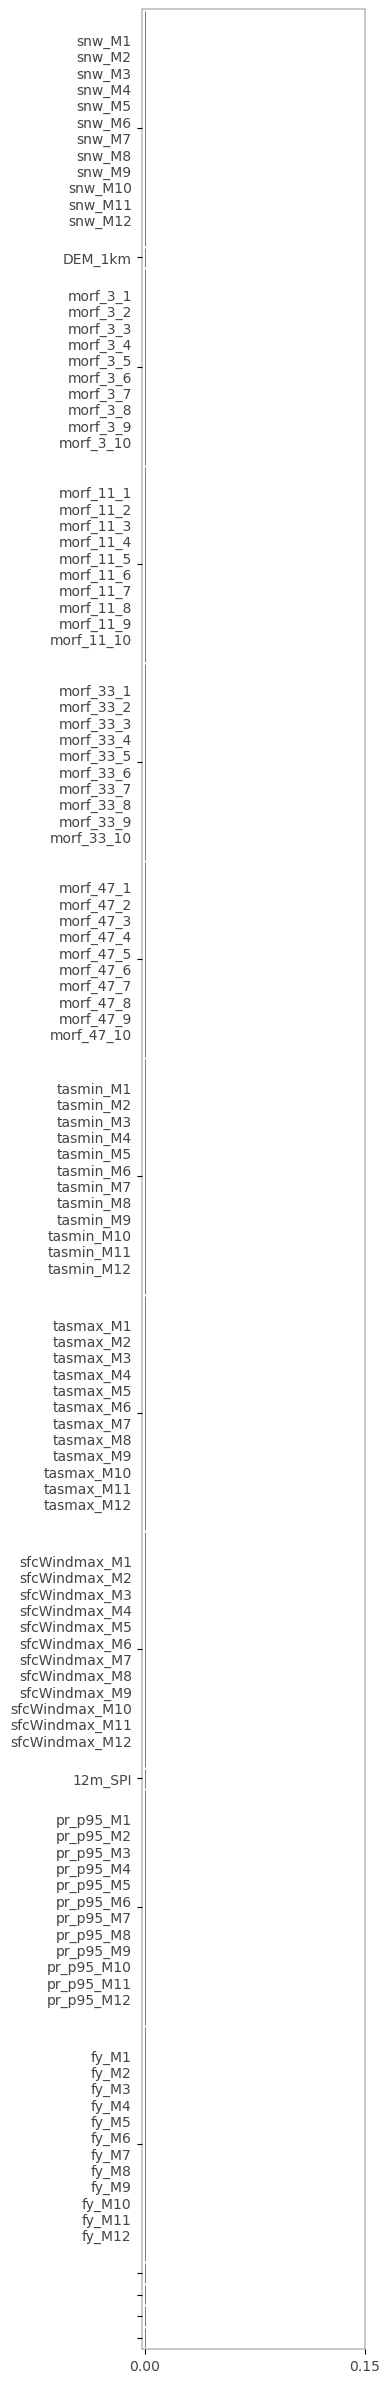

In [12]:
for model in tqdm(clf_dict):
    # loading the models:
    model_loaded = pickle.load(open(clf_dict[model], "rb"))
    
    I = importances(model_loaded, X_test, y_test, features=features)
    print(I)
    plot_importances(I)

In [ ]:
def permutation_importances(model, X_train, y_train):
    imp = dict()
    scaler = MinMaxScaler()
    minmax = scaler.fit(X_train)
    
    baseline = accuracy_score(model.predict(minmax.transform(X_train)), y_train)
    
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = accuracy_score(model.predict(minmax.transform(X_train)), y_train)
        X_train[col] = save
        imp[col] = baseline - m
    return imp
def run_feature_importance(clf_dict, X_train, y_train):
    

    for model in tqdm(clf_dict):
        # loading the models:
        model_loaded = pickle.load(open(clf_dict[model], "rb"))

        # imp = permutation_importances(model_loaded, X_train, y_train)
        # sorted_by_value = dict(sorted(imp.items(), key=lambda item: item[1]))
        # for k, v in sorted_by_value:
        #     print(k, v)
        imp = dict()
        scaler = MinMaxScaler()
        minmax = scaler.fit(X_train)
        I = importances(model_loaded, X_train, y_train)
        viz = plot_importances(I)
        viz.save('collinear_permute_' + str(model) + '.png')
        
        # fig, ax = plt.subplots(figsize=(50,100))
        # y_pos = np.arange(len(imp))
        # ax.barh(list(imp.keys()), list(imp.values()), align='center')
        # ax.set_yticks(y_pos)
        # ax.invert_yaxis()  # labels read top-to-bottom
        # ax.set_xlabel('Feature names')
        # ax.set_xlabel('Drop in model accuracy')
        # ax.set_title('Feature importances derived by permutation for ' + str(model))
        # plt.savefig(
        #         os.path.join('Feature importances derived by permutation for ' + str(model) + ".png")
        #     )
    plt.show()
# defining paths
path_to_Npys_data = os.path.join("..", "data", "Npys_data")

pathTarget_3 = os.path.join(
    os.path.join("..", "data", "Npys_data", "target_3_avg_high_res_step2.npy")
)
pathFeatures = os.path.join(path_to_Npys_data, "initial_data_Features_all_10_years.npy")
# Features
X = pd.DataFrame.from_dict(np.load(pathFeatures, allow_pickle=True), orient="columns")


# Target Variable
y = pd.DataFrame.from_dict(np.load(pathTarget_3, allow_pickle=True), orient="columns")
y = y["Target"].to_numpy()
y = np.where(y == 5, 0, y)
y = pd.DataFrame.from_dict(dict(Target = y))
run_feature_importance(clf_dict, X, y)
